<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About-this-project" data-toc-modified-id="About-this-project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About this project</a></span><ul class="toc-item"><li><span><a href="#Map-of-SST" data-toc-modified-id="Map-of-SST-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Map of SST</a></span></li><li><span><a href="#Time-series" data-toc-modified-id="Time-series-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Time series</a></span></li><li><span><a href="#Scatter-comparing-SST-and-glider-temperature" data-toc-modified-id="Scatter-comparing-SST-and-glider-temperature-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scatter comparing SST and glider temperature</a></span></li><li><span><a href="#Transverse-Mercator-for-sections" data-toc-modified-id="Transverse-Mercator-for-sections-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transverse Mercator for sections</a></span></li></ul></li></ul></div>

In [1]:
%pylab inline

import xarray as xr
import netCDF4 as nc
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import sys 
sys.path.insert(0, '..')
import scripts

Populating the interactive namespace from numpy and matplotlib


In [2]:
# rcParams changes matplotlib default values - this is useful for a constant style throughout the notebook
rcParams['savefig.dpi'] = 150
rcParams['figure.figsize'] = [14, 7]
rcParams['figure.dpi'] = 150

# About this project

You will now compare waveglider and remotely sensed SST

In this exercise we will compare the sea surface temperature from
the OSTIA SST product with the Wave Glider temperature. This is
will use all the skills you have learnt along the way.


<div>
<img src="../../images/SAMPLE_Fig1.png" style="float:left; width: 50%; margin-right: 20px; margin-bottom:50px">

## Map of SST
1. A map of average SST for the netCDF data.
2. A subset of Southern Africa (up to 20°S and down to 80°S).
3. Include the location of the wave glider as a point.
4. Add average ice fraction as a second pcolormesh layer.
</div>

<div style="clear:both; margin-top: 50px;">
<img src="../../images/SAMPLE_Fig2.png" style="float:right; width: 70%; margin-right: 20px; margin-bottom:50px">
    
## Time series
1. Time series comparing SST and wave glider temperature. 
</div>

<div style="clear:both; margin-top: 50px;">
<img src="../../images/SAMPLE_Fig3.png" style="float:left; width: 40%; margin-right: 20px; margin-bottom:50px">

## Scatter comparing SST and glider temperature
1. A scatter plot comparing resampled wave glider data with OSTIA.
   You will need to resample the wave glider data to the same sampling
   frequency as the satellite data.
2. Include a 1:1 line on this plot.
3. If you can, add the line of best fit with the slope and $r^2$ using `sklearn.linear_model.LinearRegression`

</div>

In [3]:
sst_fname = '../../data/GHRSST/201*.nc'
wgl_fname = '../../data/WaveGlider/02_wave_glider.csv'

In [4]:
xds = xr.open_mfdataset(sst_fname, autoclose=True).sel(lat=slice(-80, -20))
sst = xds.analysed_sst - 273.15
ice = xds.sea_ice_fraction

sst_avg = sst.mean('time').load()
ice_avg = ice.mean('time').load()

/Users/luke/Dev/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/luke/Dev/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)


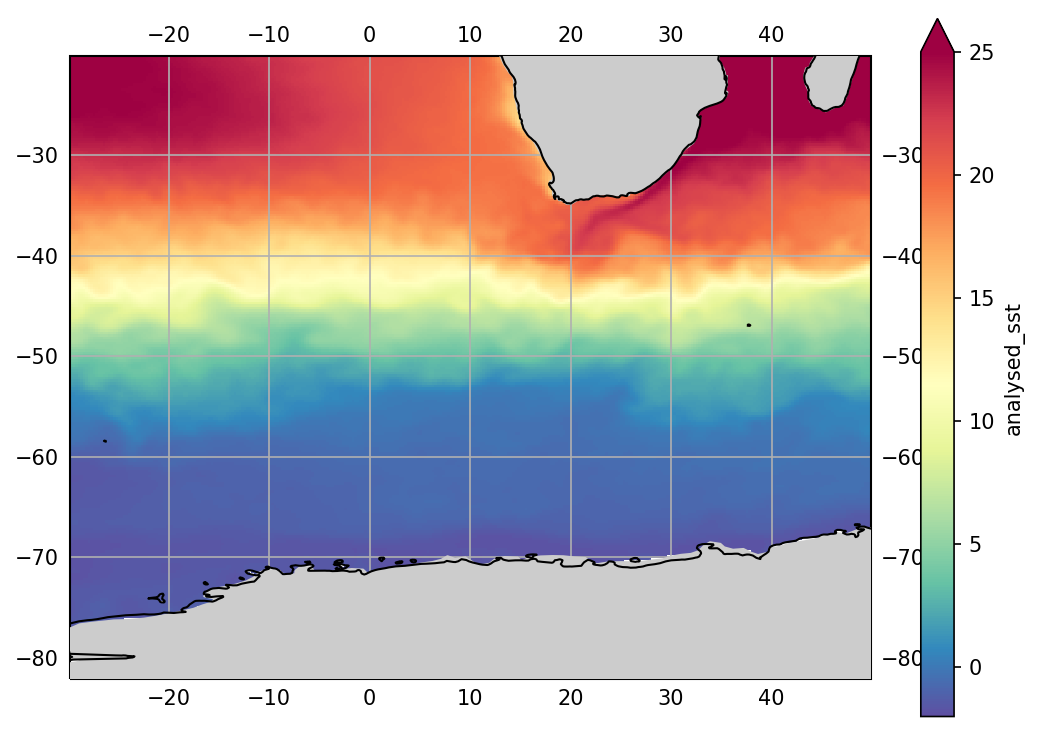

In [23]:
proj = ccrs.PlateCarree()
trns = ccrs.PlateCarree()

fig, ax = plt.subplots(1, 1, figsize=[7, 5], subplot_kw={'projection': proj})

img = sst_avg.plot(ax=ax, transform=trns, cmap=cm.Spectral_r, vmin=-2, vmax=25)

ax.set_extent([
    sst_avg.lon.min().values,
    sst_avg.lon.max().values,
    sst_avg.lat.min().values,
    sst_avg.lat.max().values,
])

ax.coastlines(resolution='50m', zorder=6)
ax.add_feature(cfeature.LAND, color='#CCCCCC', zorder=5)
ax.gridlines(draw_labels=True)
ax.yaxis.tick_left()

fig.tight_layout()